## Quick demo

Here is a quick demo on using the pre-trained Mask RCNN model to detect and segment the NMC particles from nano-tomography images. See details in other jupyter notebooks.


### Download the example data

- From the [Releases](https://github.com/hijizhou/LIBNet/releases) page, download `mask_rcnn_particles.h5` from the section `Pretrained Mask R-CNN model and example data`. Save it in the `model` directory of the repo.
- Download `example_data.zip`. Unzip it such that it's in the path `data/example/`.

### Configurations and prepration

In [20]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import skimage
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples import particles

%matplotlib inline 

config = particles.ParticlesConfig()
ROOT_DIR = os.getcwd()
PARTICLE_DIR = os.path.join(ROOT_DIR, "data/")


class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    IMAGE_RESIZE_MODE = "square"
    IMAGE_MIN_DIM = 800
    IMAGE_MAX_DIM = 1024
config = InferenceConfig()

DEVICE = "/cpu:0"
TEST_MODE = "inference"
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax


### Load data and model

In [21]:
MODEL_DIR = os.path.join(ROOT_DIR, "log/")
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)
PARTICLE_WEIGHTS_PATH = os.path.join(ROOT_DIR, "model/mask_rcnn_particle.h5")  # TODO: update this path
print("Loading weights ", PARTICLE_WEIGHTS_PATH)
model.load_weights(PARTICLE_WEIGHTS_PATH, by_name=True)

Loading weights  /home/lijz/LIBNet/model/mask_rcnn_particle.h5


In [64]:
example_dir = os.path.join(PARTICLE_DIR, "example")

image_path = os.path.join(example_dir, random.choice(os.listdir(example_dir)))

while not image_path.endswith(".jpg"):
    image_path = os.path.join(example_dir, random.choice(os.listdir(example_dir)))

image = skimage.io.imread(image_path)
image = skimage.color.gray2rgb(image)
print(image_path)

/home/lijz/LIBNet/data/example/xz0800.jpg


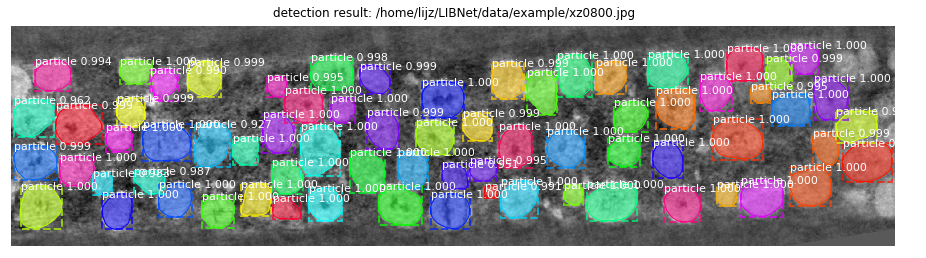

In [67]:
results = model.detect([image], verbose=0)
# Display results
r = results[0]
bbox = utils.extract_bboxes(r['masks'])

visualize.display_instances(
    image,bbox,r['masks'],r['class_ids'],['bg','particle'],r['scores'],
    title='detection result: '+image_path, ax=get_ax(),show_mask=True, show_bbox=True)